In [11]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#nltk.download_shell()
messages=[line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(messages))

5574


In [6]:
for x, y in enumerate(messages[:20]):
    print (x, y)

(0, 'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')
(1, 'ham\tOk lar... Joking wif u oni...')
(2, "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's")
(3, 'ham\tU dun say so early hor... U c already then say...')
(4, "ham\tNah I don't think he goes to usf, he lives around here though")
(5, "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, \xc2\xa31.50 to rcv")
(6, 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.')
(7, "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune")
(8, 'spam\tWINNER!! As a valued network customer you have been selected to receivea \xc2\xa3900 pr

In [12]:
messages= pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names =['label', 'message'])
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000004243C470>,
      dtype=object)

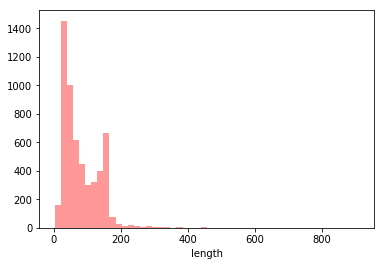

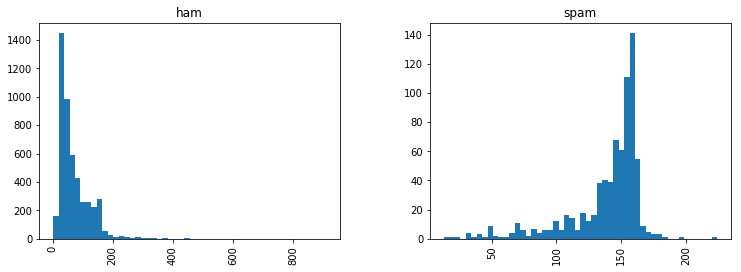

In [45]:
sns.distplot(messages['length'], kde=False, color= 'red')
messages.hist(column='length',by = 'label' ,bins=50, figsize=(12,4))

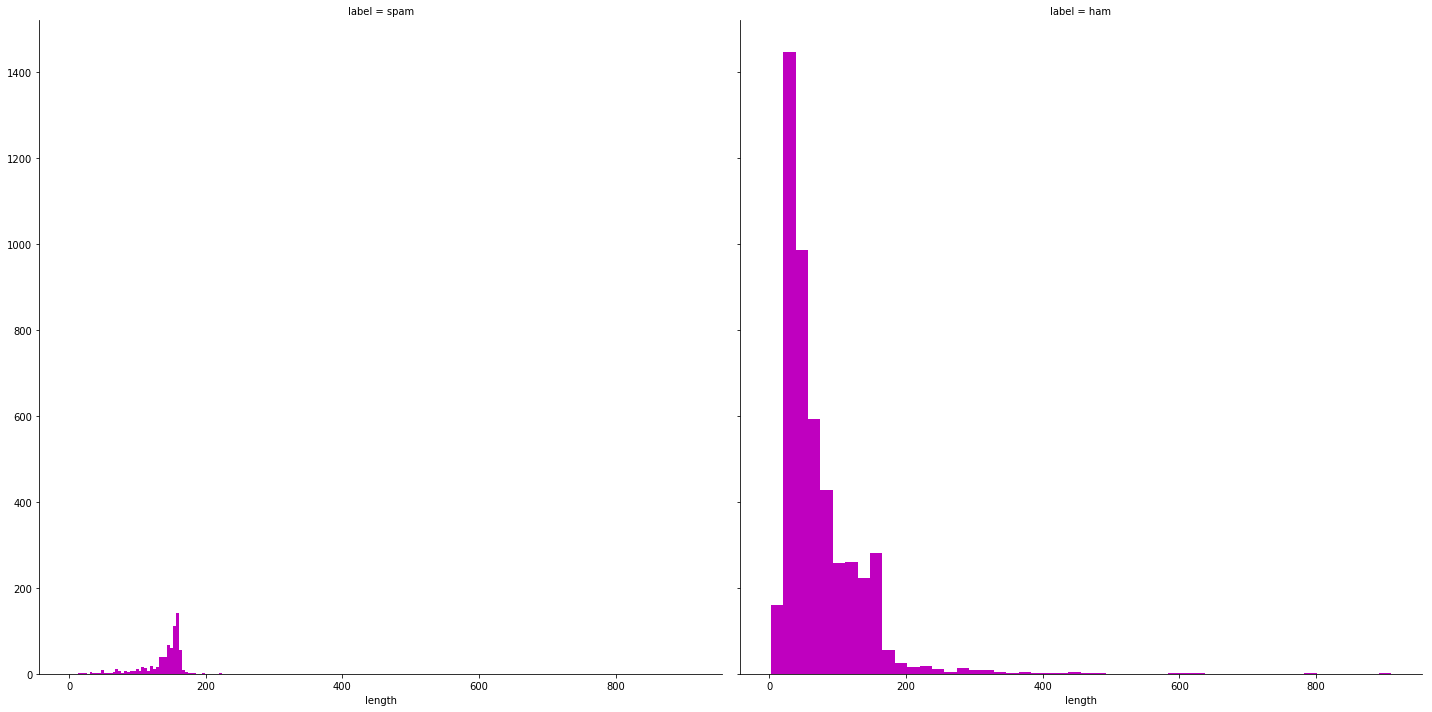

In [62]:
#messages.hist(column='length' ,bins=50, figsize=(12,4))
g = sns.FacetGrid(messages, col="label", col_order=["spam", "ham"], size =10, aspect=1)
g = g.map(plt.hist, "length", bins=50, color="m")

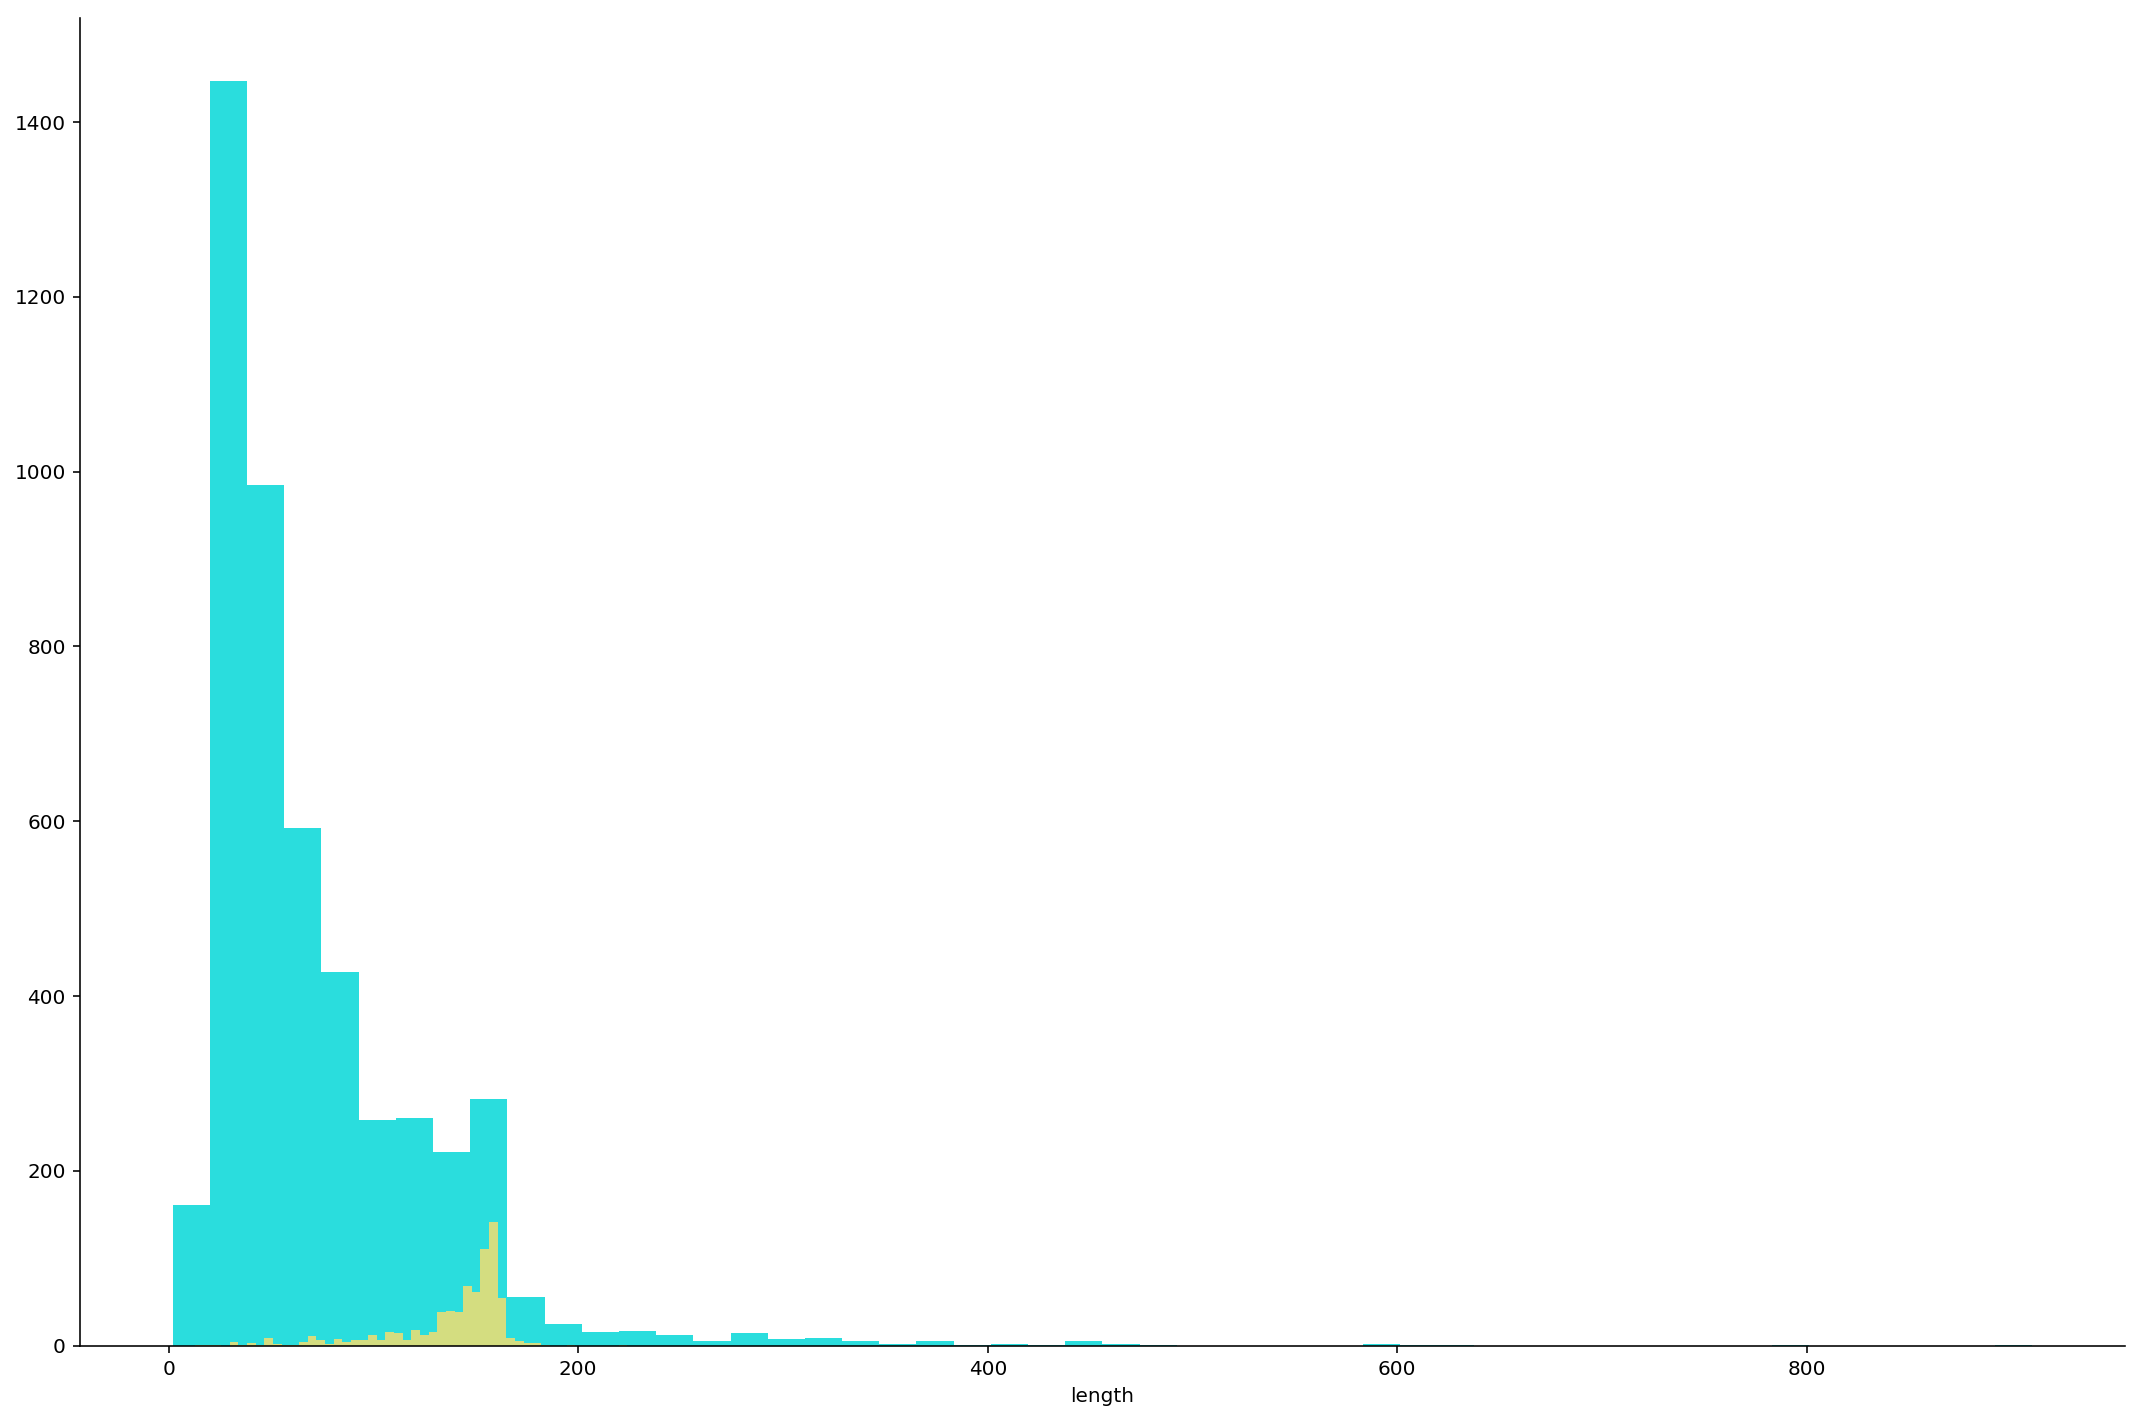

In [149]:
%config InlineBackend.figure_format = 'retina'
g = sns.FacetGrid(messages, hue="label",  col_order=["spam", "ham"],size =10, aspect=1.5,  palette="rainbow")
g = g.map(plt.hist, "length", bins=50)

Text(0.5,0,u'length')

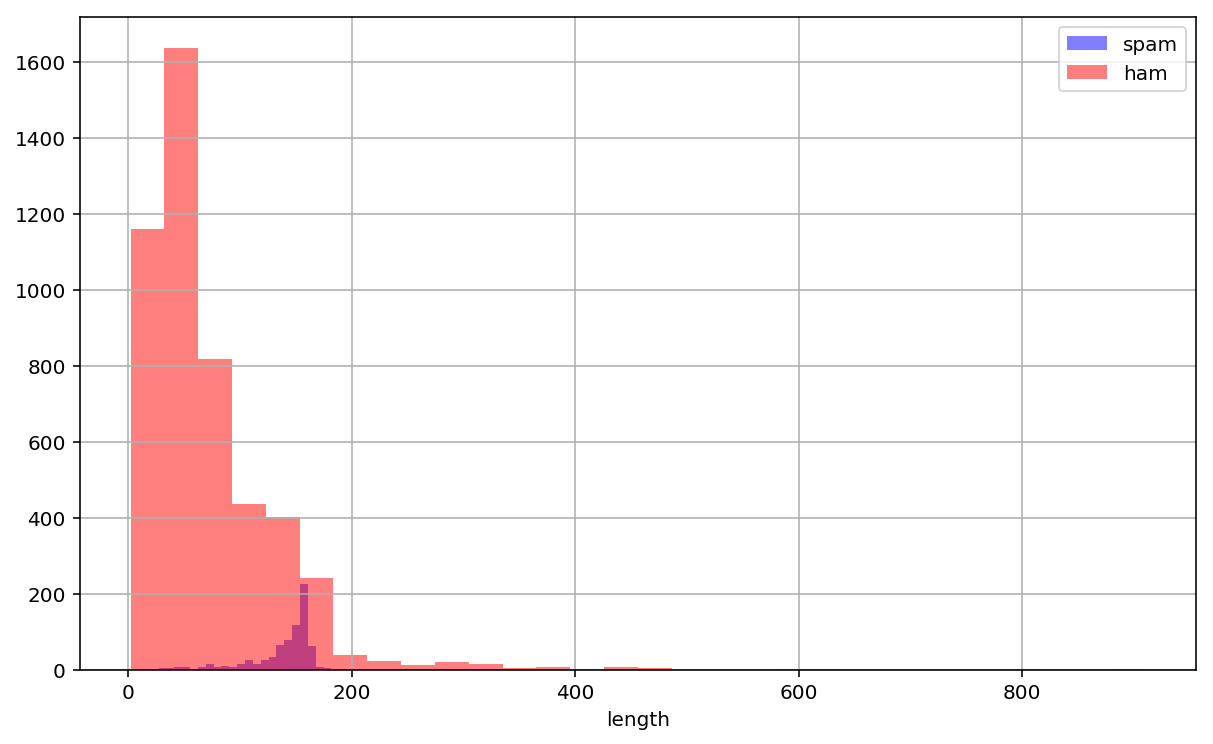

In [148]:
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(10,6))
messages[messages['label']=='spam']['length'].hist(alpha=0.5,color='blue',
                                              bins=30,label='spam')
messages[messages['label']=='ham']['length'].hist(alpha=0.5,color='red',
                                              bins=30,label='ham')
plt.legend()
plt.xlabel('length')

In [92]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOCAKMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
print (len(stopwords.words('finnish')))
print (len(stopwords.words('english')))
print (len(stopwords.words('turkish')))
print (len(stopwords.words('russian')))

235
179
53
151


In [99]:
ss='i cant ! get out, of& u'


In [150]:
%pdb
def text_process(mess):
    ws=[w for w in mess if w not in string.punctuation]
    ws2=''.join(ws)

    return [w for w in ws2.split() if w.lower() not in stopwords.words('english')]

Automatic pdb calling has been turned ON


In [107]:
messages['message'].head(5).apply(text_process)


0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [126]:
#messages.drop('mwords', axis=1, inplace= True)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [127]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
print(len(bow_transformer.vocabulary_))


C:\Users\KOCAKMA\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


11425


In [128]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [129]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [132]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [135]:
messages_bow=bow_transformer.transform(messages['message'])
messages_bow.shape

C:\Users\KOCAKMA\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


(5572, 11425)

In [137]:
messages_bow.nnz

50548

In [142]:
sparsity= float(100*messages_bow.nnz / (messages_bow.shape[0]*messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.0


In [145]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(messages_bow)
print(tfidf_transformer.transform(bow4))

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [147]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [153]:
messages_tfidf=tfidf_transformer.transform(messages_bow)

In [155]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
all_pr = spam_detect_model.predict(messages_tfidf)

In [ ]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [ ]:
pipeline.fit(msg_train,label_train)
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))
print(classification_report(predictions,label_test))